In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
import os

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = 'drive/MyDrive/Colab Notebooks/figures'
batch_size = 25
img_width = 90
img_height = 60

In [ ]:
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

In [ ]:
def augment_image(image,save_here, datagen, count=9):
  image = np.expand_dims(image, 0) 
  datagen.fit(image)
  image_generator = datagen.flow(np.array(image),save_to_dir=save_here, save_prefix='aug',save_format='png')
  for _ in range(count):
    image_generator.next()
    



In [ ]:
for category, path in enumerate(os.listdir(train_path)):
  dir_path = os.path.join(train_path,path)
  for image_path in os.listdir(dir_path):
    img = Image.open(os.path.join(dir_path,image_path))
    augment_image(img, dir_path, datagen)
  
  


In [ ]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training',
    seed=42
)

validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation',
    seed=42
)

Found 2121 images belonging to 9 classes.
Found 229 images belonging to 9 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(128,(3,3), padding='same', activation='relu', input_shape=(img_width, img_height,3)))
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=0.005), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adadelta.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=40,
    verbose=1
)

Epoch 1/40
84/84 [==============================] - 81s 894ms/step - loss: 2.1961 - accuracy: 0.1231 - val_loss: 2.1942 - val_accuracy: 0.1022
Epoch 2/40
84/84 [==============================] - 79s 945ms/step - loss: 2.1906 - accuracy: 0.1250 - val_loss: 2.1853 - val_accuracy: 0.1111
Epoch 3/40
84/84 [==============================] - 80s 949ms/step - loss: 2.1740 - accuracy: 0.1622 - val_loss: 2.1545 - val_accuracy: 0.2133
Epoch 4/40
84/84 [==============================] - 72s 854ms/step - loss: 2.1025 - accuracy: 0.2281 - val_loss: 2.0111 - val_accuracy: 0.3156
Epoch 5/40
84/84 [==============================] - 72s 858ms/step - loss: 1.8673 - accuracy: 0.2686 - val_loss: 1.7346 - val_accuracy: 0.3111
Epoch 6/40
84/84 [==============================] - 70s 834ms/step - loss: 1.6284 - accuracy: 0.3244 - val_loss: 1.5044 - val_accuracy: 0.4089
Epoch 7/40
84/84 [==============================] - 70s 830ms/step - loss: 1.4707 - accuracy: 0.3559 - val_loss: 1.3664 - val_accuracy: 0.3867

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=0.001), metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=15,
    verbose=1
)

model.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=0.0005), metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=10,
    verbose=1
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adadelta.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)


Epoch 1/15
84/84 [==============================] - 71s 830ms/step - loss: 0.5998 - accuracy: 0.7538 - val_loss: 0.6050 - val_accuracy: 0.7422
Epoch 2/15
84/84 [==============================] - 69s 813ms/step - loss: 0.6068 - accuracy: 0.7433 - val_loss: 0.5890 - val_accuracy: 0.7689
Epoch 3/15
84/84 [==============================] - 69s 826ms/step - loss: 0.6008 - accuracy: 0.7529 - val_loss: 0.5324 - val_accuracy: 0.8089
Epoch 4/15
84/84 [==============================] - 70s 832ms/step - loss: 0.6028 - accuracy: 0.7457 - val_loss: 0.6277 - val_accuracy: 0.7289
Epoch 5/15
84/84 [==============================] - 69s 823ms/step - loss: 0.5926 - accuracy: 0.7419 - val_loss: 0.5961 - val_accuracy: 0.7822
Epoch 6/15
84/84 [==============================] - 69s 814ms/step - loss: 0.5761 - accuracy: 0.7576 - val_loss: 0.5659 - val_accuracy: 0.7733
Epoch 7/15
84/84 [==============================] - 69s 823ms/step - loss: 0.5920 - accuracy: 0.7457 - val_loss: 0.6273 - val_accuracy: 0.7467

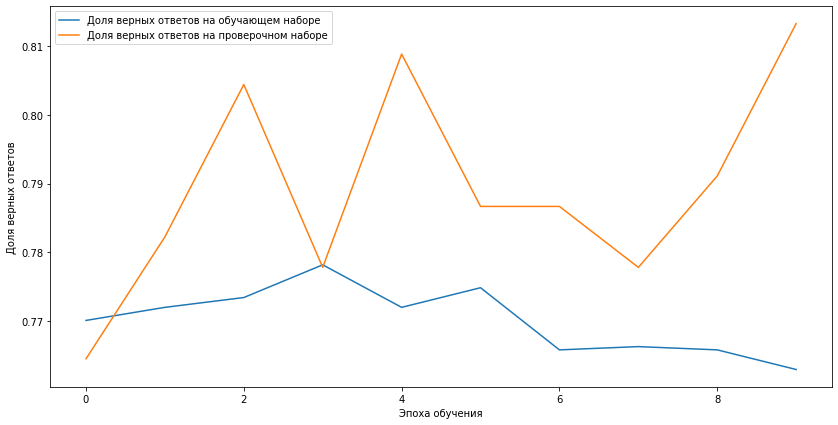

In [ ]:
plt.figure(figsize = (14, 7))
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
pred = recognizeMultiClass(model, validation_generator9Classes, "Предсказание модели")

NameError: ignored